In [12]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# Question 1

In [13]:
def ins_exp_util(p, q, y, x) :
    return p * util(y - x + q - pi(p,q), theta) + (1 - p) * util(y - pi(p,q), theta)

def pi(p, q) :
    return p * q

def util(z, theta):
    return (z ** (1 + theta)) / (1 + theta)

y = 1
p = 0.2
theta = -2

In [14]:
N = 100
x_vec = np.linspace(0.01, 0.9, N)
q_vec = np.empty(N)

for i, x in enumerate(x_vec):
    obj = lambda q : -ins_exp_util(p, q, y, x)
    sol = optimize.minimize_scalar(obj, bounds = (0, x), method = 'Bounded')
    q = sol.x
    q_vec[i] = q

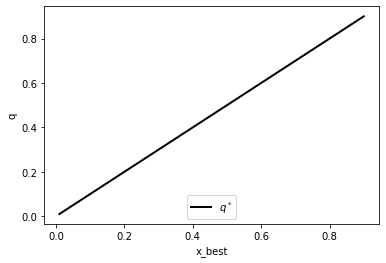

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(x_vec, q_vec, ls = '-', lw = 2, color = 'black', label = '$q^*$')

ax.set_xlabel('x_best')
ax.set_ylabel('q')
ax.legend(loc = 'lower center', frameon = True);

# Question 2

In [16]:
def ins_exp_util(pi, p, q, y, x) :
    return p * util(y - x + q - pi) + (1 - p) * util(y - pi)

def V_tilde(pi, p, q, y, x) :
    return ins_exp_util(pi, p, q, y, x) - ins_exp_util(0, p, 0, y, x)

def util(z, theta = -2):
    return (z ** (1 + theta)) / (1 + theta)

y = 1
p = 0.2
theta = -2

In [17]:
N = 100
q_vec = np.linspace(0.01, 0.6, N)
pi_vec = np.empty(N)
pi_guess = [0.0000001]

for i, q in enumerate(q_vec) :
    obj = lambda pi : V_tilde(pi, p, q, y, x)
    sol = optimize.root(obj, x0 = pi_guess)
    pi = sol.x
    pi_vec[i] = pi

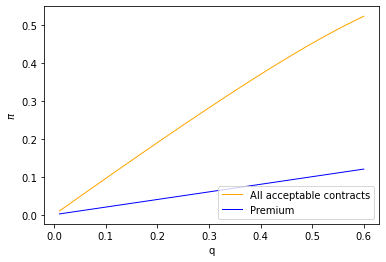

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(q_vec, pi_vec, ls = '-', lw = 1, color = 'orange', label = 'All acceptable contracts')
ax.plot(q_vec, q_vec*p, ls = '-', lw = 1, color = 'blue', label = 'Premium')

ax.set_xlabel('q')
ax.set_ylabel('$\pi$')
ax.legend(loc = 'lower right', frameon = True);

# Question 3

In [19]:
alpha = 2
beta = 7
N = 10000
x = np.random.beta(a = alpha, b = beta, size = N)

def V_mc(z, theta) :
    return util(z, theta)

def MC(x, gamma, pi):
    return np.mean(V_mc(y - (1 - gamma) * x - pi, -2))

mean1 = MC(x, 0.9, 0.2)
mean2 = MC(x, 0.45, 0.1)

print(f'(gamma, pi) = (0.9, 0.2) = {mean1:.10f}')
print(f'(gamma, pi) = (0.45, 0.1) = {mean2:.10f}')

(gamma, pi) = (0.9, 0.2) = -1.2858296414
(gamma, pi) = (0.45, 0.1) = -1.2964318924


# Question 4

In [20]:
alpha = 2
beta = 7
N = 10000
x = np.random.beta(a = alpha, b = beta, size = N)

def V_mc(z, theta) :
    return util(z, theta)

def MC(y, x, gamma, pi):
    return np.mean(V_mc(y - (1 - gamma) * x - pi, -2))

def V_maxpi(y, x, gamma, pi) :
    return MC(y,x,gamma,pi) - MC(y,x,0,0)

pi_guess = [0.000001]

obj = lambda pi : V_maxpi(y, x, 0.95, pi)
sol = optimize.root(obj, x0 = pi_guess, method = 'broyden1')

print(sol.x[0])

0.24015395244849344
